## Exploratory data analysis

We want more students to do research with professors. The incentives seem to exist: professors need students to publish and students need professors for guidance (what to ask, **what papers to read**, where to publish, etc).

We have anecdotal evidence that
- If students approach professors without any direction, chances are low
- If students approach with their own problem, chances are better
- If students approach knowing the professor's research, chances are much better.

So our initial dataset only has
- authors and the papers they wrote in `author_and_papers.csv`
- papers and the references in `paper_and_references.csv`



## Task 1 - basic exploration

- Load the data
- For both datasets, look at the first few, last few, and a random sample of records in the datasets (hint: `pandas.DataFrame.sample()`).
- (no code) Why do we care about looking at a few records
- How many professors are there in our dataset? (Multiple answers!)
- How many papers are in our dataset? (Multiple answers!)

In [2]:
import pandas as pd

In [3]:
auth_pap = pd.read_csv("author_and_papers.csv")
biblio = pd.read_csv("paper_and_references.csv")

In [4]:
biblio.head(3)

,Unnamed: 0,auth_id,auth_title,ref_id,ref_title
0,0,20,Nonlinear evolution via spatially-dependent li...,278,"Penalized matrix decomposition for denoising, ..."
1,1,20,Nonlinear evolution via spatially-dependent li...,1392,Resting-state hemodynamics are spatiotemporall...
2,2,20,Nonlinear evolution via spatially-dependent li...,1498,Wide-field optical mapping of neural activity ...


In [5]:
biblio.tail(3)

,Unnamed: 0,auth_id,auth_title,ref_id,ref_title
3718,3718,11636,Population predictive checks,11705,Scalable bayes via barycenter in wasserstein s...
3719,3719,11636,Population predictive checks,11706,Stan r&d: research and development expenditure...
3720,3720,11636,Population predictive checks,11709,Cross-validatory choice and assessment of stat...


In [6]:
auth_pap.sample(3)

,Unnamed: 0,author_id,given_name,family_name,middle_name,paper_id,paper_title
2114,2114,114,Matteo,Carandini,NaN,1478,Distinct contributions of mouse cortical areas...
1613,1613,1046,Theodoros,Tsiligkaridis,NaN,1051,Covariance estimation in high dimensions via k...
551,551,3706,Nelson,Cowan,NaN,299,NaN


In [6]:
auth_pap.author_id.unique().shape

(7098,)

## Why care about a few records?

Data is rarely entered randomly. Seeing the beginning and ending records can inform us about possible rules governing the data entry (e.g. by time, by alphebet) and whether certain format changes have occurred.
A random sample is useful to catching unexpected things (e.g. missing data) in the data.

## Number of Prof

In [18]:
num_prof = auth_pap.author_id.unique().shape[0]

In [19]:
print("there are {num_prof} number of professors in the dataset".format(num_prof=num_prof))

there are 7098 number of professors in the dataset


## Getting paper count

In [21]:
paper_set1 = biblio.auth_title.unique().tolist()

In [22]:
paper_set2 = biblio.ref_title.unique().tolist()

In [23]:
paper_set3 = auth_pap.paper_title.unique().tolist()

In [28]:
pap_titles = paper_set1 + paper_set2 + paper_set3
len(pap_titles)

6123

In [30]:
# set() can only hold unique values
len(set([str(title).lower() for title in pap_titles]))

3090

## Task 2 - Some analysis

Calculate, then graph the following:
- How many papers are associated with each professor?
- How many authors does each paper have?
- How many references does each paper have?
- Are the same references being used by multiple papers?

In [19]:
# for-loop over the unique set

In [23]:
# pandas.DataFrame.groupby()

In [41]:
auth_pap.head(3)

,Unnamed: 0,author_id,given_name,family_name,middle_name,paper_id,paper_title
0,0,2,S,Rahmann,NaN,4,Snakemake--a scalable bioinformatics workflow ...
1,1,1678,J,Koster,NaN,4,Snakemake--a scalable bioinformatics workflow ...
2,2,109,Victoria,Stodden,NaN,15,Scientific tests and continuous integration st...


In [32]:
# Approach 1, using for-loops
paper_count = []
for prof in auth_pap.author_id.unique():
    is_target_prof = auth_pap.author_id == prof
    paps_by_target_auth = auth_pap.loc[is_target_prof, "paper_id"].unique()
    paper_count.append(paps_by_target_auth.shape[0])

<AxesSubplot:ylabel='Count'>

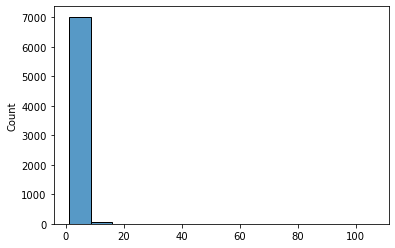

In [33]:
import seaborn as sns

sns.histplot(paper_count)

In [34]:
auth_count = auth_pap.loc[:, ["paper_id", "author_id"]].drop_duplicates().groupby("paper_id").count()

In [35]:
auth_cnt2 = auth_count.reset_index()

In [36]:
ref_count = biblio.loc[:, ["ref_id", "auth_id"]].drop_duplicates().groupby("auth_id").count()

<AxesSubplot:ylabel='Count'>

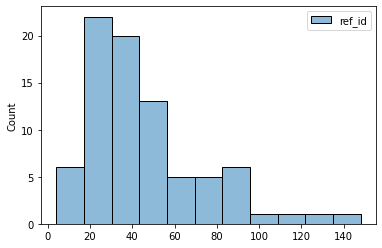

In [42]:
sns.histplot(ref_count)

In [38]:
ref_cnt2 = ref_count.reset_index()

In [39]:
ref_cnt2.head(2)

,auth_id,ref_id
0,20,40
1,48,78


In [40]:
auth_count.sort_values("author_id")

,author_id
paper_id,
8998,1
5280,1
2712,1
10685,1
7073,1
...,...
5221,72
1711,107
11469,116


In [43]:
auth_count2 = biblio.loc[:, ["auth_id", "ref_id"]].drop_duplicates().groupby("ref_id").count()

<AxesSubplot:ylabel='Count'>

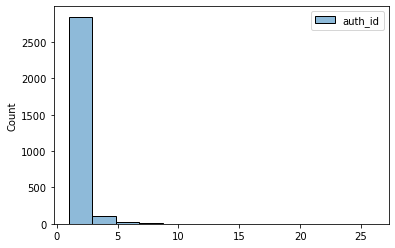

In [44]:
import seaborn as sns

sns.histplot(auth_count2)

In [66]:
auth_count2.columns

Index(['auth_id'], dtype='object')

In [67]:
auth_count2.loc[auth_count2.auth_id > 20,:]

,auth_id
ref_id,
299,26
917,26


In [69]:
biblio.loc[(biblio.ref_id == 299) | (biblio.ref_id == 917),"ref_title"].unique()

array(['Preprint repository arxiv achieves milestone million uploads',
       nan], dtype=object)

## Task 3 - Targeted search

- Which and how many professors have a paper with the word "deep learning" in it? What about "bayesian"? What about "causal"?

In [70]:
auth_pap.columns

Index(['Unnamed: 0', 'author_id', 'given_name', 'family_name', 'middle_name',
       'paper_id', 'paper_title'],
      dtype='object')

In [46]:
keyword = "bayesian"

def profs_with_skills(keyword, auth_pap):
    has_keyword = auth_pap.paper_title.apply(lambda x: str(x).lower().find(keyword) != -1)
    return auth_pap.loc[has_keyword, ["family_name", "given_name"]]

In [47]:
test = profs_with_skills('deep learning', auth_pap)
test.shape

(84, 2)

In [48]:
test = profs_with_skills('causal inference', auth_pap)

In [49]:
test.shape

(80, 2)

In [50]:
test = profs_with_skills('bayesian', auth_pap)
test.shape

(511, 2)

## Task 4 - Joining the datasets

- If a paper has more authors, does it likely have more references? How are you testing this out?
- Do the same professors reference the same papers over multiple publications?

In [51]:
auth_cnt2.rename(columns={"author_id": "auth_count"}, inplace=True)

In [52]:
auth_cnt2.head(3)

,paper_id,auth_count
0,4,2
1,15,5
2,20,6


In [53]:
ref_cnt2.rename(columns={"ref_id": "ref_count"}, inplace=True)

In [54]:
ref_cnt2.head(3)

,auth_id,ref_count
0,20,40
1,48,78
2,74,45


In [55]:
# We use an inner join because otherwise we cannot see this
jdf = pd.merge(auth_cnt2, ref_cnt2, left_on="paper_id", right_on="auth_id")

In [56]:
jdf.head(3)

,paper_id,auth_count,auth_id,ref_count
0,20,6,20,40
1,48,7,48,78
2,74,12,74,45


/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='auth_count', ylabel='ref_count'>

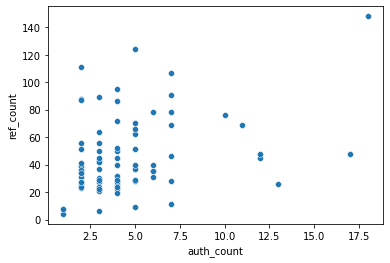

In [57]:
import seaborn as sns

sns.scatterplot(jdf.auth_count, jdf.ref_count)

In [60]:
import numpy as np
perm_outputs = []
for i in range(2000):
    perm_auth_cnt = np.random.choice(jdf.auth_count, jdf.shape[0])
    perm_outputs.append(np.corrcoef(jdf.ref_count, perm_auth_cnt)[0, 1])

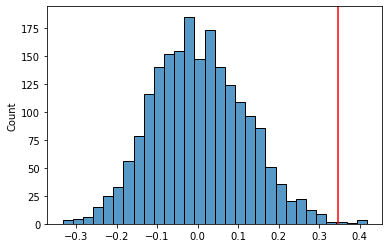

In [61]:
import matplotlib.pyplot as plt
sns.histplot(perm_outputs)
plt.axvline(x=np.corrcoef(jdf.ref_count, jdf.auth_count)[0, 1],
            color='red')


### Very unlikely to see our correlation by chance